# Regressão 01 - tarefa 03 - transformações em X e Y

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import matplotlib.pyplot as plt
import scipy.stats as stats

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     50.78
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           6.65e-31
Time:                        19:08:15   Log-Likelihood:                -349.90
No. Observations:                 244   AIC:                             709.8
Df Residuals:                     239   BIC:                             727.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7961      0.224      3.

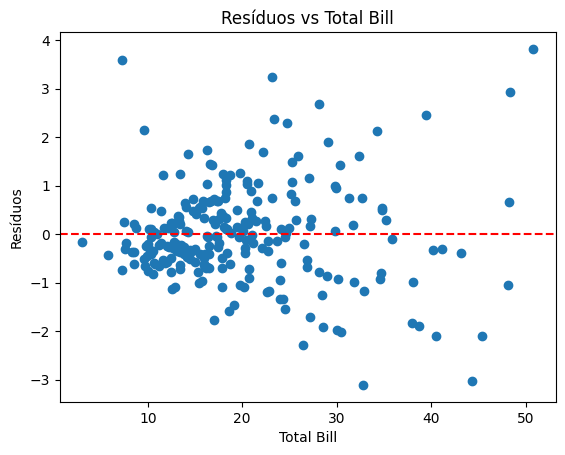

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     44.93
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           4.12e-28
Time:                        19:08:16   Log-Likelihood:                -356.54
No. Observations:                 244   AIC:                             723.1
Df Residuals:                     239   BIC:                             740.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0644      0.482     -6.

In [ ]:
# Criar a matriz de design com Patsy
y, X = patsy.dmatrices('tip ~ sex + smoker + time + total_bill', data=tips, return_type='dataframe')

# Ajustar o modelo linear
modelo = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(modelo.summary())

# Plotar os resíduos em função de 'total_bill'
residuos = modelo.resid
plt.scatter(tips['total_bill'], residuos)
plt.xlabel('Total Bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Total Bill')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Testar transformação logarítmica
tips['log_total_bill'] = np.log(tips['total_bill'])
y_log, X_log = patsy.dmatrices('tip ~ sex + smoker + time + log_total_bill', data=tips, return_type='dataframe')
modelo_log = sm.OLS(y_log, X_log).fit()
print(modelo_log.summary())

# Testar polinômio
tips['total_bill_squared'] = tips['total_bill'] ** 2
y_poly, X_poly = patsy.dmatrices('tip ~ sex + smoker + time + total_bill + total_bill_squared', data=tips, return_type='dataframe')
modelo_poly = sm.OLS(y_poly, X_poly).fit()
print(modelo_poly.summary())

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [ ]:
# Calcular o R² na escala original de 'tip' (sem o log)
predicoes_log = modelo_log.predict(X)
predicoes_tip = np.exp(predicoes_log)  # Reverter o logaritmo para a escala original

# Calcular o R² na escala original
SS_res = np.sum((tips['tip'] - predicoes_tip) ** 2)
SS_tot = np.sum((tips['tip'] - np.mean(tips['tip'])) ** 2)
r2_original = 1 - (SS_res / SS_tot)
print(f"R² na escala original: {r2_original}")

# Comparar com o modelo original (do item 1)
y_original, X_original = patsy.dmatrices('tip ~ sex + smoker + time + total_bill', data=tips, return_type='dataframe')
modelo_original = sm.OLS(y_original, X_original).fit()
print(modelo_original.summary())

R² na escala original: -1.3955313180607254e+86
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     50.78
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           6.65e-31
Time:                        19:08:16   Log-Likelihood:                -349.90
No. Observations:                 244   AIC:                             709.8
Df Residuals:                     239   BIC:                             727.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [ ]:
df = pd.read_csv('previsao_de_renda.csv')
df = df.dropna()
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


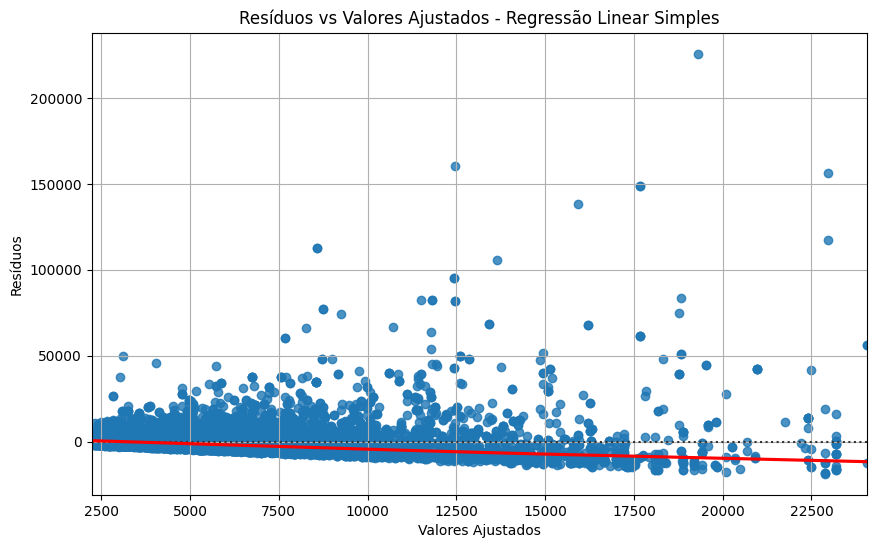

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:17:25   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Ajuste do modelo de regressão linear simples
X = df['tempo_emprego']
y = df['renda']

# Adiciona uma constante para o modelo de regressão linear
X = sm.add_constant(X)
modelo_simples = sm.OLS(y, X).fit()

# Resumo do modelo simples
modelo_simples_resumo = modelo_simples.summary()

# Análise de resíduos
residuos_simples = modelo_simples.resid

# Plotar gráfico de resíduos
plt.figure(figsize=(10, 6))
sns.residplot(x=modelo_simples.fittedvalues, y=residuos_simples, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados - Regressão Linear Simples')
plt.grid(True)
plt.show()

modelo_simples_resumo

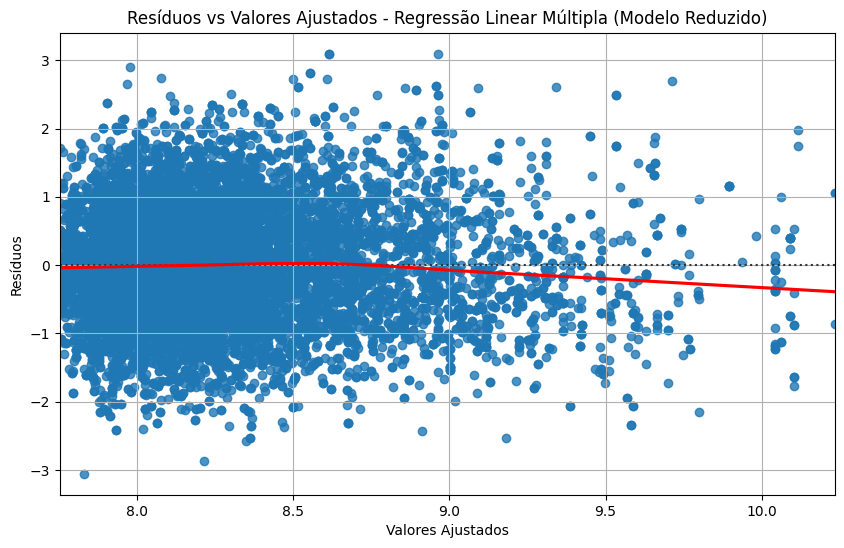

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     875.5
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:21:50   Log-Likelihood:                -15124.
No. Observations:               12427   AIC:                         3.026e+04
Df Residuals:                   12423   BIC:                         3.029e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.6448      0.034    223.544      0.000       7.578       7.712
tempo_emprego             0.0559      0.001     51.045      0.000       0.054       0.058
qtd_filhos               -0.0567      0.022     -2.627      0.009      -0.099      -0.014
qt_pessoas_residencia     0.0952      0.018      5.256      0.000       0.060       0.131
==============================================================================
Omnibus:                       28.962   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.154
Skew:                           0.118   Prob(JB):                     4.67e-07
Kurtosis:                       2.975   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Colocando renda em Logaritmo e adicionando variaveis explicativas

df['log_renda'] = np.log(df['renda'])

variaveis_explicativas = ['tempo_emprego', 'idade', 'qtd_filhos', 'qt_pessoas_residencia']

# Constante
X_multiplo = sm.add_constant(df[variaveis_explicativas])
y_multiplo = df['log_renda']

modelo_multiplo = sm.OLS(y_multiplo, X_multiplo).fit()

# Resumo do modelo múltiplo
modelo_multiplo_resumo = modelo_multiplo.summary()

# Análise de resíduos do modelo múltiplo
residuos_multiplo = modelo_multiplo.resid

# Remoção de variáveis não significativas (p-valor > 0.05)
modelo_multiplo_reduzido = modelo_multiplo
while any(modelo_multiplo_reduzido.pvalues > 0.05):
    variavel_max_pvalor = modelo_multiplo_reduzido.pvalues.idxmax()
    if variavel_max_pvalor == 'const':
        break
    variaveis_explicativas.remove(variavel_max_pvalor)
    X_reduzido = sm.add_constant(df[variaveis_explicativas])
    modelo_multiplo_reduzido = sm.OLS(y_multiplo, X_reduzido).fit()

# Resumo do modelo reduzido
modelo_reduzido_resumo = modelo_multiplo_reduzido.summary()

# Plotar gráfico de resíduos do modelo reduzido
plt.figure(figsize=(10, 6))
sns.residplot(x=modelo_multiplo_reduzido.fittedvalues, y=modelo_multiplo_reduzido.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados - Regressão Linear Múltipla (Modelo Reduzido)')
plt.grid(True)
plt.show()

modelo_reduzido_resumo